In [1]:
"""# I. Preparing the dataset """
#1 Importing essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

#2 Importing the dataset
dataset = pd.read_csv('Salary_Data.csv')


Idependent Variable (Experience):
 [[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]

Dependent Variable (Salary):
 [ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


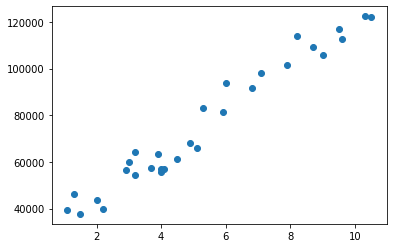

In [2]:
#3 Classify dependent and independent variables
X = dataset.iloc[:,:-1].values  #independent variable YearsofExperience
y = dataset.iloc[:,-1].values  #dependent variable salary

print("\nIdependent Variable (Experience):\n", X)
print("\nDependent Variable (Salary):\n", y)

plt.scatter(X, y, alpha=1)

In [3]:
#4 Creating training set and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size = 1/3,random_state = 0) 

print("\n\nTraining Set :\n----------------\n")
print("X = \n", X_train)
print("y = \n", y_train)

print("\n\nTest Set :\n----------------\n")
print("X = \n",X_test)
print("y = \n", y_test)



Training Set :
----------------

X = 
 [[ 2.9]
 [ 5.1]
 [ 3.2]
 [ 4.5]
 [ 8.2]
 [ 6.8]
 [ 1.3]
 [10.5]
 [ 3. ]
 [ 2.2]
 [ 5.9]
 [ 6. ]
 [ 3.7]
 [ 3.2]
 [ 9. ]
 [ 2. ]
 [ 1.1]
 [ 7.1]
 [ 4.9]
 [ 4. ]]
y = 
 [ 56642.  66029.  64445.  61111. 113812.  91738.  46205. 121872.  60150.
  39891.  81363.  93940.  57189.  54445. 105582.  43525.  39343.  98273.
  67938.  56957.]


Test Set :
----------------

X = 
 [[ 1.5]
 [10.3]
 [ 4.1]
 [ 3.9]
 [ 9.5]
 [ 8.7]
 [ 9.6]
 [ 4. ]
 [ 5.3]
 [ 7.9]]
y = 
 [ 37731. 122391.  57081.  63218. 116969. 109431. 112635.  55794.  83088.
 101302.]


In [4]:
#5 Train the Regressor with training set
model = sm.OLS(y_train, X_train).fit()

#6 predict the outcome of test sets
y_Pred = model.predict(X_test)

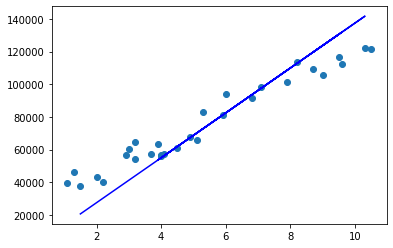

In [5]:
#7 Mapping the Regression Line
plt.scatter(X, y, alpha=1)
plt.plot(X_test, y_Pred, c = 'blue')

In [6]:
#8 Calculating the Accuracy of the predictions
from sklearn import metrics
print("Prediction Accuracy = ", metrics.r2_score(y_test, y_Pred))

# Print out the statistics
print(model.summary())

Prediction Accuracy =  0.8111465166115929
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.965
Model:                            OLS   Adj. R-squared (uncentered):              0.963
Method:                 Least Squares   F-statistic:                              525.3
Date:                Sat, 14 Sep 2019   Prob (F-statistic):                    2.64e-15
Time:                        19:21:29   Log-Likelihood:                         -219.36
No. Observations:                  20   AIC:                                      440.7
Df Residuals:                      19   BIC:                                      441.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]

In [7]:
#9 Some more inights
print ('MAE:', metrics.mean_absolute_error(y_Pred, y_test))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_Pred, y_test)))
print ('R-Squared:', metrics.r2_score(y_Pred, y_test))

MAE: 10828.326955554774
RMSE: 12581.660968849912
R-Squared: 0.9016135955873352


In [8]:
#10 Comparing Actual and Predicted Salaries for he test set
print("\nActual vs Predicted Salaries \n-------------------------\n")
print("Actual :\n ", y_test)
print("Predicted :\n ", y_Pred)


Actual vs Predicted Salaries 
-------------------------

Actual :
  [ 37731. 122391.  57081.  63218. 116969. 109431. 112635.  55794.  83088.
 101302.]
Predicted :
  [ 20630.47442402 141662.59104493  56389.96342565  53639.23350245
 130659.67135212 119656.75165931 132035.03631372  55014.59846405
  72894.34296487 108653.8319665 ]
